# Imports

In [11]:
import pandas as pd
import requests
import json
import matplotlib

In [13]:
params = {
    'token': '.eyJ1IjogImYxNDQzM2QxLWJhZWEtNGM5MC04ZDc1LWIxNmJiZDBkM2NjZSIsICJpZCI6ICI2NGRlZmY5Mi0xMDcyLTQ3MDYtOTQ0My02ODM1ZjE0NDE1ZGYifQ.ANDdHelFCeqlBZO9lmVxeSjrGBbW2y1ZFMVHBfEht44',
    'q':'SELECT pickup_datetime, dropoff_datetime, puzone, dozone, trip_time, passenger_count, trip_distance FROM nyc_taxi_zone_clean_pipe LIMIT 1000'
}

url = 'https://api.tinybird.co/v0/pipes/nyc_taxi_zone_clean_pipe.json'
response = requests.get(url, params=params, stream=True)
stream = response.json()
stream.keys()
#print(stream)

dict_keys(['meta', 'data', 'rows', 'rows_before_limit_at_least', 'statistics'])

In [19]:
#f_stat = open(r'./stations.json')
#stat_json = json.load(f_stat)
df_stats = pd.json_normalize(stream, record_path=['data']) # normalize because of the nested list/dicts
#f_stat.close() # close file descriptor
df_stats.info()
#df_stats = df_stats.drop(columns=["Unnamed: 0"])# Eliminate undesired columns
# change to datetime pickup and dropoff
#df_stats['trip_time'] = pd.to_numeric(df_stats['trip_time'] , errors='coerce' , downcast='integer')
df_stats['pickup_datetime'] = pd.to_datetime(df_stats['pickup_datetime'])
df_stats['dropoff_datetime'] = pd.to_datetime(df_stats['dropoff_datetime'])
df_stats['puzone'] = df_stats['puzone'].astype(str)
df_stats['dozone'] = df_stats['dozone'].astype(str)
df_stats = df_stats.dropna() # drop nulls
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pickup_datetime   1000 non-null   object 
 1   dropoff_datetime  1000 non-null   object 
 2   puzone            1000 non-null   object 
 3   dozone            1000 non-null   object 
 4   trip_time         1000 non-null   int64  
 5   passenger_count   1000 non-null   int64  
 6   trip_distance     1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pickup_datetime   1000 non-null   datetime64[ns]
 1   dropoff_datetime  1000 non-null   datetime64[ns]
 2   puzone            1000 non-null   object        
 3   dozone            1000 non-nu

array([[<AxesSubplot:title={'center':'trip_time'}>]], dtype=object)

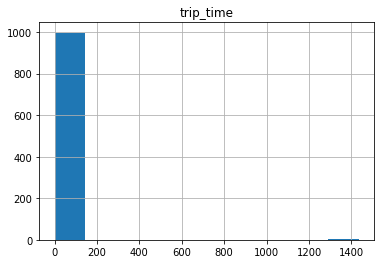

In [20]:
df_stats.hist(column='trip_time') #Histogram